# Implementation of Shaffer et al

In [1]:
import numpy as np # We'll need numpy later
from scipy.stats import kstest, ttest_ind, ks_2samp, zscore
import matplotlib.pyplot as plt # This lets us access the pyplot functions

## (1) Estimation of a sample mean from a normally distributed variable.

Let us assume that a true distribution of a process is described by the normal distribution with $\mu=5$ and $\sigma=1$. You have a measurement technique that allows you to sample n points from this distribution. In Python we can use a random number generator whose numbers will be chosen from the desired normal distribution by using the function `np.random.normal`. Sample from this normal distribution from n=1 to 50 (i.e. n=1:50). Create a plot for the standard deviation of the calculated mean from each n when you repeat the sampling 1000 times each. (i.e. You will repeat your n observations 1000 times and will calculate the sample mean for each of the 1000 trials).

In [2]:
# Hint: You can get 50 normally-distributed random numbers all at once:
# x = np.random.normal(mean, standard_deviation, size=50)
mu = 5
std = 1

stdev_sample = np.zeros(50)

# Explore how this works. It uses array processing along an axis to avoid an additional loop
# for the repeated sampling.
for n in range(50):
    sample_data = np.random.normal(mu, std, size=(n + 1, 1000))

    # axis=0 means only take the mean across that axis
    sample_mean = np.mean(sample_data, axis=0)
    assert sample_mean.shape == (1000,)

    # Now we can take the standard deviation across the remaining axis
    stdev_sample[n] = np.std(sample_mean)


#### 1a. Plot the standard deviation of the sample mean versus n. Add a second line which is 1/sqrt(n). Describe what this tells you about the relationship between n and your power to estimate the underlying mean.

Text(0, 0.5, 'Sample Mean')

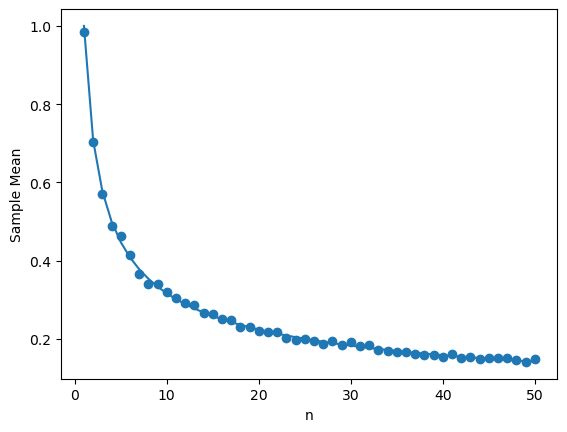

In [3]:
# Answer to 1a here
# plt.scatter(x, y) and plt.plot(x, y) will give you scatter and line plots

n_vals = np.zeros(50)
for n in range(50):
    n_vals[n]=n+1

plt.scatter(n_vals, stdev_sample)

plt.plot(n_vals, 1/(n_vals)**0.5)

plt.xlabel("n")
plt.ylabel("Sample Mean")

# As n increases, the data has less variation, and the power to estimate the underlying mean increases.
# Larger samples lead to means closer to the underlying mean.

#### 1b. Plot the boxplot for the sample means for all values n. Using words, interpret what the boxplot view of the 1000 trials for n=1 means and what the trends in the boxplot demonstrate compared to the plot in 1a. What information do you gain or lose in the two different plotting schemes?

Text(0, 0.5, 'Sample Mean')

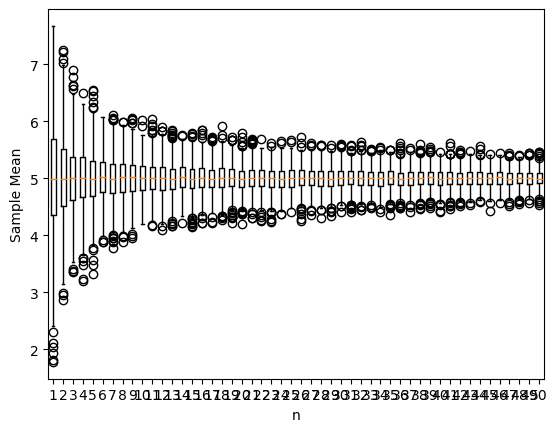

In [4]:
# Answer to 1b here
# Hint: You'll want to look at plt.boxplot(sample_mean), where sample_mean is a 2D array.

#for n in range(50):
def getmean(n):
    sample_data = np.random.normal(mu, std, size=(n + 1, 1000))
    sample_mean = np.mean(sample_data, axis=0)
    assert sample_mean.shape == (1000,)
    return sample_mean.reshape(-1,1)


means_2d = np.hstack([getmean(n) for n in range(50)]) 

plt.boxplot(means_2d)

plt.xlabel("n")
plt.ylabel("Sample Mean")


The boxplot for n=1 is a boxplot of 1000 points from the original data rather than means from sampling 2 or more at a time. The boxplots all together show that as n increases, the median stays about the same, but the variation in the data decreases. The interquartile range decreases because more values are closer to the median. The boxplot shows the range of values and helps to visualize the range shrinking. It also allows us to see outliers. The scatter plot allows us to match to the fit line of 1/sqrt(n) to model the relationship with a function.



#### 1c. For n=3, plot the histogram of the mean for the 1000 trials. Use the Kolmogorov-Smirnov test to see if this sample distribution is normal. (Hint: You may need to translate this to the *standard* normal distribution.) Report the sample mean and sample standard deviation, the p-value from the test, and whether you would reject the null hypothesis.

Sample mean: 5.0146887835044875
Sample standard deviation: 0.5034912340584756
KS: 0.012903313356400908
p-value: 0.995594012955728
Fail to reject null hypothesis; the sample distribution is normal


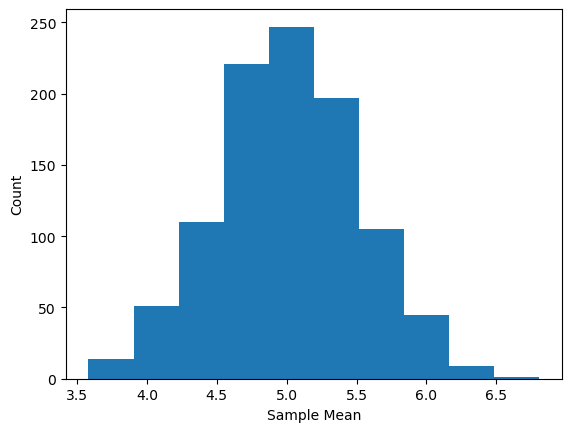

In [5]:
# Answer to 1c here
# stat, pvalue = kstest(zscore_sample_means, 'norm') will return the ks statistic and p-value
# for the KS test against the standard normal distribution.

sample_data_3 = np.random.normal(mu, std, size=(3 + 1, 1000))
sample_mean_3 = np.mean(sample_data_3, axis=0)

plt.hist(sample_mean_3)

plt.xlabel("Sample Mean")
plt.ylabel("Count")

zscore_sample_means = (sample_mean_3 - np.mean(sample_mean_3)) / np.std(sample_mean_3)

stat, pvalue = kstest(zscore_sample_means, 'norm')

print("Sample mean:", np.mean(sample_mean_3))
print("Sample standard deviation:", np.std(sample_mean_3))
print("KS:", stat)
print("p-value:", pvalue)

if pvalue < 0.05:
    print("Reject null hypothesis; the sample distribution is not normal")
else:
    print("Fail to reject null hypothesis; the sample distribution is normal")

#### 1d. Repeat 1c but for n=20. What changes when the number of samples increases?

Sample mean: 4.9979446037890884
Sample standard deviation: 0.21635991104867
KS: 0.02210046338706284
p-value: 0.704455863943197
Fail to reject null hypothesis; the sample distribution is normal


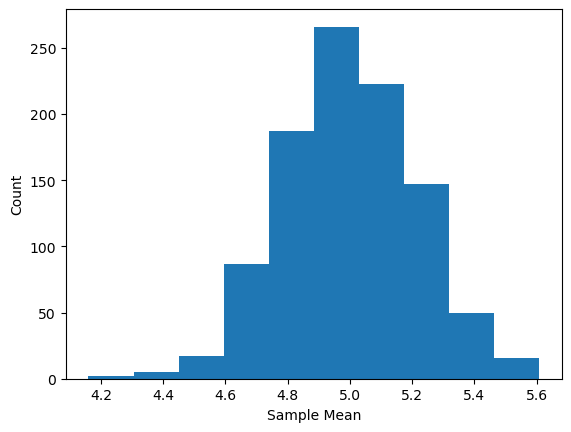

In [6]:
# Answer to 1d here
sample_data_20 = np.random.normal(mu, std, size=(20 + 1, 1000))
sample_data_20 = np.mean(sample_data_20, axis=0)

plt.hist(sample_data_20)
plt.xlabel("Sample Mean")
plt.ylabel("Count")

zscore_sample_means = (sample_data_20 - np.mean(sample_data_20)) / np.std(sample_data_20)

stat, pvalue = kstest(zscore_sample_means, 'norm')

print("Sample mean:", np.mean(sample_data_20))
print("Sample standard deviation:", np.std(sample_data_20))
print("KS:", stat)
print("p-value:", pvalue)

if pvalue < 0.05:
    print("Reject null hypothesis; the sample distribution is not normal")
else:
    print("Fail to reject null hypothesis; the sample distribution is normal")
    
# When the number of samples increases, the standard deviation decreases and the distribution becomes narrower.

## (2) Now we will explore sampling from an alternate distribution type.

#### 2a. Sample the Pareto distribution (`np.random.pareto`) with parameter shape = 2, 1000 times. Plot the histogram of these values. Describe the shape of this histogram in words. Is it anything like the normal distribution?

Text(0, 0.5, 'Frequency')

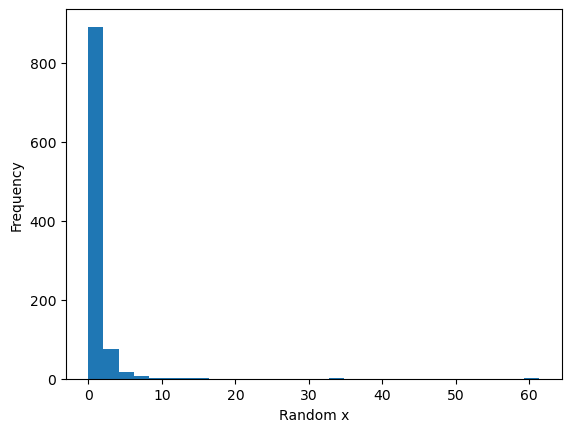

In [7]:
# Answer 2a here
# plt.hist(x, bins=30) will make a histogram with 30 bins

pareto_dist = np.zeros(1000)

for n in range(1000):
    pareto_dist[n] = np.random.pareto(2)
    
plt.hist(pareto_dist, bins=30)

plt.xlabel("Random x")
plt.ylabel("Frequency")

# It does not look like the normal distribution. It begins very high and quickly drops down.

#### 2b. What do you expect the sample distribution of the mean to look like for n=2. Just like a Pareto distribution, normal distribution, or something else? You can make a plot if you would like, but don't have to.

I expect the sample distribution for n=2 to look somewhat like a normal distribution, but it will be relatively wide and irregular because of the small sample size.

#### 2c. How about for n=1,000,000?

I expect that when n is a very large number like 1000000, the sample distribution will look like a normal distribution that is very narrow.

## (3) Differential expression. In this problem you will use the two-sample t-test to explore what differential hypothesis testing looks like in known standards and how multiple hypothesis correction effects the number of false positives and negatives from these tests.
- Distribution 1, normal with mu=1, sigma=1
- Distribution 2, normal with mu=3, sigma=1

In [8]:
# Here is a function where you can input the mean and stdev for each distribution
# and then get back the number of positive outcomes from the two-sample t-test
# (all other tests were negative outcomes)

# n: the sample size
# n_tests: number of tests
# alpha: the significance cutoff

def two_sample_ttest(n: int, n_tests: int, mu1: float, mu2: float, sigma: float, alpha: float) -> int:
    # This loads all the trials in one big array at once, hence no loop
    dist1_sample = np.random.normal(mu1, sigma, size=(n, n_tests))
    dist2_sample = np.random.normal(mu2, sigma, size=(n, n_tests))
    _, p_values = ttest_ind(dist1_sample, dist2_sample)

    return np.sum(p_values <= alpha)

# Example:
# two_sample_ttest(1000, 100, 1.0, 3.0, 1.0, 0.05)

#### 3a. False Negative: Using n=3, perform 100 comparisons of distribution 1 versus distribution 2 with an alpha=0.05. Anytime you fail to reject the hypothesis it is a false negative. Why is this a false negative? Report the number of false negatives from your 100 tests.

In [9]:
# Answer to 3a here.
positives = two_sample_ttest(3, 100, 1.0, 3.0, 1.0, 0.05)
print('False negatives:', 100 - positives)

# This is a false negative because it should reject the null hypothesis but it fails to. 
# They are different distributions, so they should be significantly different, thus rejecting the null hypothesis that they are the same.
# Number of false negatives sample: 58

False negatives: 59


#### 3b. False Positives: Using n=3, perform 100 comparisons of distribution 1 versus distribution 1 with an alpha=0.05. Anytime you reject the hypothesis this is a false positive. Why is this a false positive? Report the number of false positives from your 100 tests.

In [10]:
# Answer to 3b here.
positives = two_sample_ttest(3, 100, 1.0, 1.0, 1.0, 0.05)
print('False positives:', positives)

# This is a false positive because it should fail to reject the null hypothesis but it rejects it.
# This compares the same  distribution. Therefore, the null hypothesis should not be rejected for one to model the other.
# Number of false positives sample: 8

False positives: 4


#### 3c. Repeat 3b but 1000 times. What is the number of false positives? Predict the number of false positives you would get if you compared samples from the same distribution 10,000 times and explain why.

I predict around 500 false positives with 10000 tests because it is about 5% for the 100 and 1000 cases. The null hypothesis is rejected when the two distributions do not align enough and have a p-value below 0.05. This indicates that the values that make the distribtuions differ are unlikely to be random. But in the false positive case, they are random because the samples are from the same distribution. There is a lot of variety in the number of false positives, but an estimate of about 5% of the cases because that is the p-value cutoff is the expected amount of false positives.

In [11]:
# Answer to 3c
positives = two_sample_ttest(3, 1000, 1.0, 1.0, 1.0, 0.05)
print(positives)

53


#### 3d. Now sweep n from 3 to 30 and report the number of false positives and false negatives for each n when you run 100 comparisons. (Provide this in a table format). Please explain the trend you see and interpret its meaning.

Trend of table below:
As the n value increases, the number of false negatives decreases. The two distributions become narrower around their respective underlying means. They overlap less as n increases, resulting in fewer false negatives which occur when the distributions appear statistically the same. 

As n increases, the number of false positives does not change very much. Since it is the same distribution, both get narrower as n increases, and they have approximately the same amount of difference each time. Therefore, there are about the same amount of false positives which mistake them for different distributions.

In [12]:
# Answer to 3d

print ("n   False Positives   False Negatives")
for n in range (3,31):
    false_pos = two_sample_ttest(n, 100, 1.0, 1.0, 1.0, 0.05)
    false_neg = 100 - two_sample_ttest(n, 100, 1.0, 3.0, 1.0, 0.05)
    print(n, "        ", false_pos, "           ", false_neg)



n   False Positives   False Negatives
3          3             51
4          9             36
5          6             18
6          8             10
7          6             7
8          10             3
9          7             2
10          5             1
11          6             1
12          2             0
13          7             0
14          0             0
15          3             0
16          2             0
17          5             0
18          3             0
19          6             0
20          9             0
21          4             0
22          5             0
23          4             0
24          9             0
25          5             0
26          8             0
27          6             0
28          7             0
29          1             0
30          4             0


#### 3e. For n=3, suggest how the number of false negatives changes according to sigma for the two distributions and test this. Report your new values and sigma and the number of false negatives in 100 tests.

In [13]:
# Answer to 3e
false_neg = 100 - two_sample_ttest(3, 100, 1.0, 3.0, 1.0, 0.05)
#print(false_neg)

# As sigma increases, the number of false negatives increases. 

sigma = 0.5
for n in range(5):
    false_neg = 100 - two_sample_ttest(3, 100, 1.0, 3.0, sigma, 0.05)
    print(false_neg) # sample results for 5 trials: 6, 7, 5, 6, 5
    
sigma = 1.0
for n in range(5):
    false_neg = 100 - two_sample_ttest(3, 100, 1.0, 3.0, sigma, 0.05)
    print(false_neg) # sample results for 5 trials: 53, 58, 53, 51, 57
    
sigma = 3.0
for n in range(5):
    false_neg = 100 - two_sample_ttest(3, 100, 1.0, 3.0, sigma, 0.05)
    print(false_neg) # sample results for 5 trials: 88, 91, 86, 85, 88


4
6
8
3
8
56
50
48
59
49
94
89
88
94
90


#### 3f. Lastly, perform 3d for p < 0.01 instead of p < 0.05. How does this influence the rate of false positives and negatives? How might you use this when performing many tests?

Increasing the p-value decreases the number of false negatives and increases the number of false postives. You can use this when performing many tests to change the cutoff for the p-value. This could be helpful if having either false negatives or false positives can be harmful. In some cases, one may want to minimize false negatives because false positives are less dangerous, or vice versa.

In [14]:
# Answer to 3f
p = 0.5

false_neg = 100 - two_sample_ttest(3, 100, 1.0, 3.0, 1.0, p)
print('False negatives:', false_neg)

positives = two_sample_ttest(3, 100, 1.0, 1.0, 1.0, p)
print('False positives:', positives)

False negatives: 6
False positives: 54


## (4) Power analysis

Now that we've observed the trends above, we have all the tools to talk about power analysis. Power analysis is an essential step when designing an experiment, and asks *assuming we should be rejecting the null hypothesis, what is the probability we will do so*. The power of an experiment is equal to 1 minus the false negative rate. A common choice for the power of an experiment (like a p-value cutoff of 0.05) is 0.8.

#### 4a. Power analysis is often used to determine the necessary N of an experiment. Why might this be used as opposed to the false positive rate?

Power analysis uses the false negative rate. In some cases, a false negative might be a lot more harmful than a false positive, so power analysis would be better to use than a p-value cutoff for false positives. For example, it would be better to detect a condition in a patient who does not have it (and then do further testing) than to miss it in a patient that does have it.

#### 4b. Determine the necessary N to acheive a power of 0.8 from the situation in (3).

In [20]:
# Answer.
total = 0
avg_rate = 1
n = 1

while 1-avg_rate < 0.8: 
    total = 0;
    for m in range(100):
        false_neg = 100 - two_sample_ttest(n, 100, 1.0, 3.0, 1.0, 0.05)
        total += false_neg
    avg_rate = total/10000
    n +=1

print("N:", n-1)

# N usually equals 6

N: 6


## (5) Shaffer et al

In this excercise we're going to explore some basic concepts of statistics, and use them to build up to some more advanced ideas. To examine these ideas we're going to consider a classic of molecular biology—the [Luria-Delbrück experiment](https://en.wikipedia.org/wiki/Luria–Delbrück_experiment). The data we'll use is from [Shaffer et al](https://www.nature.com/articles/nature22794).

In [16]:
repOne = np.array([259, 213, 182, 167, 254, 221, 236, 168, 190, 262, 285, 158, 240, 187, 326, 116, 220, 309, 181, 268, 285, 467, 121, 177, 188, 116, 218, 195, 260, 307, 213, 314, 220, 245, 325, 220, 222, 336, 60, 268, 252, 112, 252])
repTwo = np.array([28, 72, 53, 103, 46, 90, 105, 78, 86, 127, 30, 52, 105, 111, 88, 35, 23, 119, 89, 110, 138, 79, 118, 107, 38, 71, 104, 61, 125])

#### 5a. First, we need to build up a distribution of outcomes for what an experiment would look like if it followed the Luria-Delbruck process.
Fill in the function below keeping track of normal and mutant cells. Then, make a second function, `CVofNRuns`, that runs the experiment 3000 times. You can assume a culture size of 120000 cells, and mutation rate of 0.0001 per cell per generation. What does the distribution of outcomes look like?

Text(0, 0.5, 'Count')

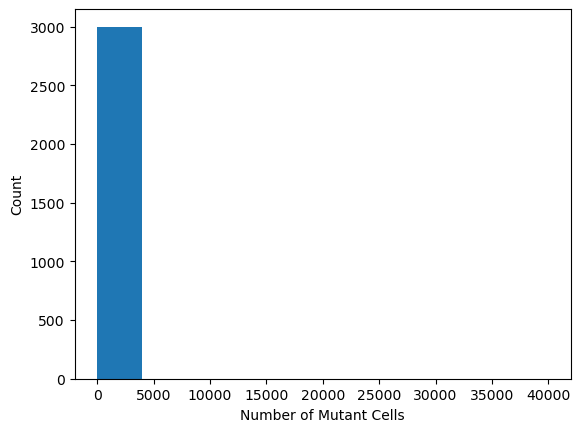

In [17]:
# Runs the simulation a bunch of times, and looks for how often the fano (cv/mean) comes out to one side

def simLuriaDelbruck(cultureSize, mutationRate):
    nCells, nMuts = 1, 0  # Start with 1 non-resistant cell

    for _ in range(int(np.floor(np.log2(cultureSize)))):  # num of gens
        nCells = 2*nCells     # Double the number of cells, simulating division
        newMuts = np.random.poisson(nCells * mutationRate)  # de novo
        nMuts = 2*nMuts + newMuts      # Previous mutants divide and add
        nCells = nCells - newMuts      # Non-resistant pop goes down by newMuts

    return nMuts


simulation = np.zeros(3000)

def CVofNRuns(): 
    for n in range(3000):
        simulation[n] = simLuriaDelbruck(120000, 0.0001)
    return simulation

plt.hist(simulation, range=[0, 40000])

plt.xlabel("Number of Mutant Cells")
plt.ylabel("Count")

# The distribution in the histogram is just one bar

#### 5b. Compare the distribution of outcomes between the two replicates of the experiment using the 2-sample KS test. Are they consistent with one another?
Hint: Each experiment varies slightly in the amount of time it was run. The absolute values of the numbers doesn't matter, so much as the variation of them. You'll need to correct for this by dividing by the mean of the results.

In [18]:
# Answer to 5b
repOneCorrected = repOne / np.mean(repOne)
repTwoCorrected = repTwo / np.mean(repTwo)

stat, pvalue = ks_2samp(repOneCorrected, repTwoCorrected)
#print(stat)
print(pvalue)

# They are consistent with one another because the p-value is greater than 0.05

0.1784655548732054


#### 5c. Compare the distribution of outcomes between the experiment and model. Are our results consistent with resistance arising through a Luria-Delbruck related process?

In [19]:
# Answer to 5c

simulationCorrected = CVofNRuns() / np.mean(CVofNRuns())
    
stat, pvalue = ks_2samp(repOneCorrected, simulationCorrected)
print("repOne and simulation:")
print(stat)
print(pvalue)

stat, pvalue = ks_2samp(repTwoCorrected, simulationCorrected)
print("repTwo and simulation:")
print(stat)
print(pvalue)

# The results are not consistent with Luria Delbruck resistance because the p-value is much smaller than 0.05

repOne and simulation:
0.6337209302325582
5.2192190972449826e-17
repTwo and simulation:
0.5157701149425288
1.2779502467944006e-07
